# Project: Predicting Boston Housing Prices

## Introduction
In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a *good fit* could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Housing). The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. For the purposes of this project, the following preprocessing steps have been made to the dataset:
- 16 data points have an `'MEDV'` value of 50.0. These data points likely contain **missing or censored values** and have been removed.
- 1 data point has an `'RM'` value of 8.78. This data point can be considered an **outlier** and has been removed.
- The features `'RM'`, `'LSTAT'`, `'PTRATIO'`, and `'MEDV'` are essential. The remaining **non-relevant features** have been excluded.
- The feature `'MEDV'` has been **multiplicatively scaled** to account for 35 years of market inflation.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit
from matplotlib import pyplot
import seaborn as sns

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)
    
# Success
print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

/usr/lib/python3/dist-packages/matplotlib/__init__.py:874: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Boston housing dataset has 489 data points with 4 variables each.


## Data Exploration
In this first section of this project, we will investigate about the Boston housing data and observations. Familiarizing with the data through an explorative process is a fundamental practice to help us better understand and justify results.

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into **features** and the **target variable**. The **features**, `'RM'`, `'LSTAT'`, and `'PTRATIO'`, give us quantitative information about each data point. The **target variable**, `'MEDV'`, will be the variable we seek to predict. These are stored in `features` and `prices`, respectively.

### Implementation: Calculate Statistics
For very first coding implementation, we will calculate descriptive statistics about the Boston housing prices.

In the code cell below, we will need to implement the following:
- Calculate the minimum, maximum, mean, median, and standard deviation of `'MEDV'`, which is stored in `prices`.
  - Store each calculation in their respective variable.

In [2]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print ("Statistics for Boston housing dataset:\n")
print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


***Description of features***

- `'RM'` is the average number of rooms among homes in the neighborhood.
- `'LSTAT'` is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
- `'PTRATIO'` is the ratio of students to teachers in primary and secondary schools in the neighborhood.

Let us find the relationship between different features using correlation plot


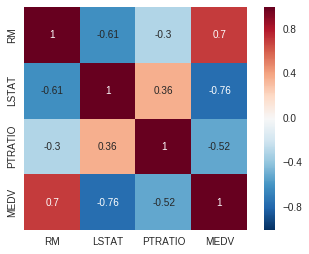

In [3]:
corr=data.corr()
ax=sns.heatmap(corr,square=True,annot = True)

It is clear from the above correlation plot:-

1)House prices should increase with the increase in number of rooms(RM) in general(positive correlation)

2)With increase in LSTAT value price might go down(negative correlation)

3)With increase in PTRATIO price may go down(negative correlation).

----

## Developing a Model
In this second section of the project, we will develop the tools and techniques necessary for a model to make a prediction. Being able to make accurate evaluations of each model's performance through the use of these tools and techniques helps to greatly reinforce the confidence in our predictions.

### Implementation: Define a Performance Metric
It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, we will be calculating the [*coefficient of determination*](http://stattrek.com/statistics/dictionary.aspx?definition=coefficient_of_determination), R<sup>2</sup>, to quantify our model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions. 

The values for R<sup>2</sup> range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the **target variable**. A model with an R<sup>2</sup> of 0 is no better than a model that always predicts the *mean* of the target variable, whereas a model with an R<sup>2</sup> of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the **features**. _A model can be given a negative R<sup>2</sup> as well, which indicates that the model is **arbitrarily worse** than one that always predicts the mean of the target variable._

For the `performance_metric` we will evaluate:
r2_score

In [4]:
# TODO: Import 'r2_score'
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    # TODO: Calculate the performance score between 'y_true' and 'y_predict'
    score = r2_score(y_true,y_predict)
    
    # Return the score
    return score

### Question 2 - Goodness of Fit
Assume that a dataset contains five data points and a model made the following predictions for the target variable:

| True Value | Prediction |
| :-------------: | :--------: |
| 3.0 | 2.5 |
| -0.5 | 0.0 |
| 2.0 | 2.1 |
| 7.0 | 7.8 |
| 4.2 | 5.3 |

Run the code cell below to use the `performance_metric` function and calculate this model's coefficient of determination.

In [5]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination, R^2, of {:.3f}.".format(score))

Model has a coefficient of determination, R^2, of 0.923.


Since the coefficient of determination is **0.93** which is very close to 1, hence this model has captured 92 percent variation of target. 

### Implementation: Shuffle and Split Data
Next implementation requires the Boston housing dataset and split the data into training and testing subsets. Typically, the data is also shuffled into a random order when creating the training and testing subsets to remove any bias in the ordering of the dataset.

In [6]:
# TODO: Import 'train_test_split'
from sklearn.cross_validation import train_test_split

# TODO: Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,prices,test_size=0.2,random_state=0)


# Success
print ("Training and testing split was successful.")

Training and testing split was successful.


We split data into training and testing set because we want out mode to be generalized and does not gets overfit. For selecting training and test data we shuffle the data and select some percentage of shuffled data to train out model and get the accuracy score over testing set. The shuffling of data also ensures that data does not gets repeated.

----

## Analyzing Model Performance
In this third section of the project, we'll take a look at several models' learning and testing performances on various subsets of training data. Additionally, we'll investigate one particular algorithm with an increasing `'max_depth'` parameter on the full training set to observe how model complexity affects performance. Graphing our model's performance based on varying criteria can be beneficial in the analysis process, such as visualizing behavior that may not have been apparent from the results alone.

### Learning Curves
The following code cell produces four graphs for a decision tree model with different maximum depths. Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R<sup>2</sup>, the coefficient of determination.  

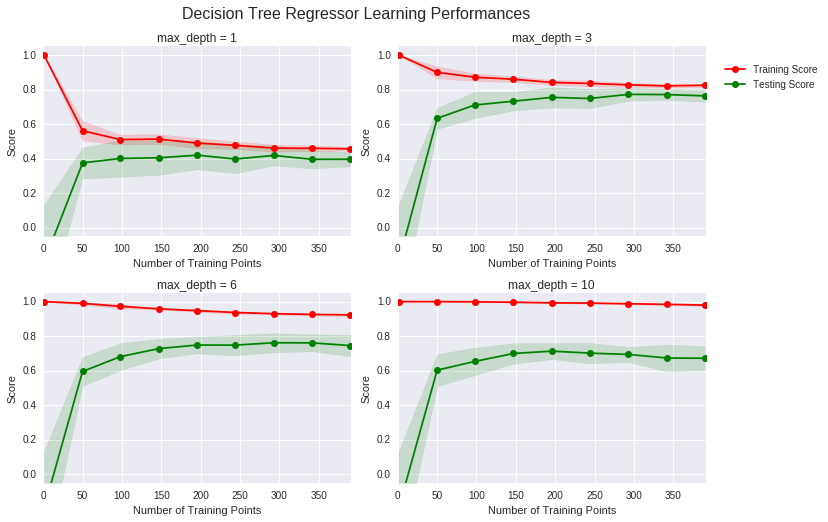

In [7]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

**Lets analyze graph 1 having maximum depth 1**

Score will remain almost constant for both training and test curve.

Since the model is suffering from high bias so adding more training data won't help much in training curve and same will be the case with testing curve.

### Complexity Curves
The following code cell produces a graph for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the **learning curves**, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the `performance_metric` function.  


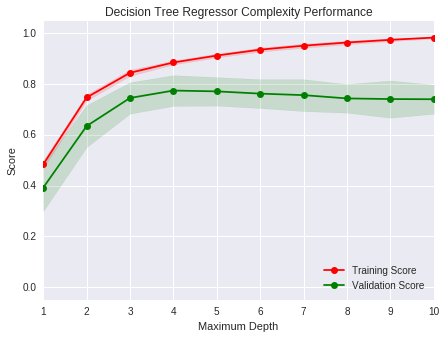

In [8]:
vs.ModelComplexity(X_train, y_train)

***High bias is a sign of underfitting(model is not complex enough to pick up the nuances in the data) and high variance is a sign of overfitting(model is by-hearting the data and cannot generalize well).***

At depth  1 it suffers from high bias because both the scores are very low.

At depth 10 it suffers from high variance because the difference between the scores curves at depth 10 very high(diverging).


### Best-Guess Optimal Model
Max depth of 4 generalises the model for unseen data.
This leads to the intuition that as we increase the depth we need more number of training data to overcome the underfitting as it does not gets better with increase in depth. At depth 4 we get our best validation score without overcomplicating our model. 

## Evaluating Model Performance
In this final section of the project, we will construct a model and make a prediction on the client's feature set using an optimized model from `fit_model`.

***In grid search we define the range of hyperparameter used in tunning a model for generating best cross validation score.***

    
***For example, in DecisionTreeRegressor() the parameter max_depth is kept as variable : a regularization constant C and a kernel hyperparameter γ. Now GridSearch trains the model by incorporating range of values of max_depth from 1 to 10.
and evaluates their performance on cross validation set.***


## K-Fold Cross Validation
In k-fold cross validation we shuffle and split the original data into K equal subsets (folds) to test our model on these folds.

We take one fold as validation set and other set as training set(k-1). We use each fold to produce the cross validationi result and than finally we average to get final result.

This make sure that we use all the data for training and validation.

If we use Kfold method data will split sequentially by default.

In grid search we are getting accuracy based on varying the hyperparameters and finding test score on test data which may not give the accuracy that we want as there are chances that the knowledge about test set might leaks into the model and evaluation metrices. That's why we divide the train data into k folds and get our evaluation metrices. This makes our model more prone to overfitting.

### Implementation: Fitting a Model
the fiinal implementation requires that we bring everything together and train a model using the **decision tree algorithm**. To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the `'max_depth'` parameter for the decision tree. The `'max_depth'` parameter can be thought of as how many questions the decision tree algorithm is allowed to ask about the data before making a prediction. Decision trees are part of a class of algorithms called *supervised learning algorithms*.

In addition, we will implement  `ShuffleSplit()` for an alternative form of cross-validation. While it is not the K-Fold cross-validation technique we described above , this type of cross-validation technique is just as useful!. The `ShuffleSplit()` implementation below will create 10 (`'n_splits'`) shuffled sets, and for each shuffle, 20% (`'test_size'`) of the data will be used as the *validation set*.

Please note that ShuffleSplit has different parameters in scikit-learn versions 0.17 and 0.18.
For the `fit_model` function in the code cell below, we will need to implement the following:
- Use [`DecisionTreeRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html) from `sklearn.tree` to create a decision tree regressor object.
  - Assign this object to the `'regressor'` variable.
- Create a dictionary for `'max_depth'` with the values from 1 to 10, and assign this to the `'params'` variable.
- Use [`make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html) from `sklearn.metrics` to create a scoring function object.
  - Pass the `performance_metric` function as a parameter to the object.
  - Assign this scoring function to the `'scoring_fnc'` variable.
- Use [`GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) from `sklearn.grid_search` to create a grid search object.
  - Pass the variables `'regressor'`, `'params'`, `'scoring_fnc'`, and `'cv_sets'` as parameters to the object. 
  - Assign the `GridSearchCV` object to the `'grid'` variable.

In [9]:
# TODO: Import 'make_scorer', 'DecisionTreeRegressor', and 'GridSearchCV'
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit


def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    # sklearn version 0.18: ShuffleSplit(n_splits=10, test_size=0.1, train_size=None, random_state=None)
    # sklearn versiin 0.17: ShuffleSplit(n, n_iter=10, test_size=0.1, train_size=None, random_state=None)
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # TODO: Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # TODO: Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11,1)}
    

    # TODO: Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric, greater_is_better=True)


    # TODO: Create the grid search cv object --> GridSearchCV()
    # Make sure to include the right parameters in the object:
    # (estimator, param_grid, scoring, cv) which have values 'regressor', 'params', 'scoring_fnc', and 'cv_sets' respectively.
    grid =GridSearchCV(estimator=regressor, param_grid=params,scoring=scoring_fnc,cv=cv_sets)
    
    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [10]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


** Hint: ** The answer comes from the output of the code snipped above.

**Answer: ** 

Maximum depth is 4.

From the above plot also it can be verified that the optimal depth was at 4.

### Eg:-

| Feature | Client 1 | Client 2 | Client 3 |
| :---: | :---: | :---: | :---: |
| Total number of rooms in home | 5 rooms | 4 rooms | 8 rooms |
| Neighborhood poverty level (as %) | 17% | 32% | 3% |
| Student-teacher ratio of nearby schools | 15-to-1 | 22-to-1 | 12-to-1 |


**Hint:** Using statistics we calculated in the **Data Exploration** section to help justify out response.

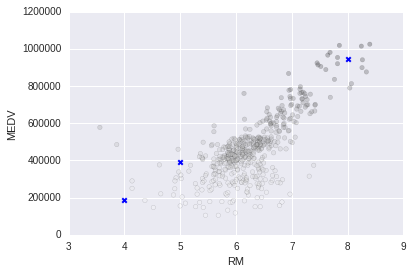

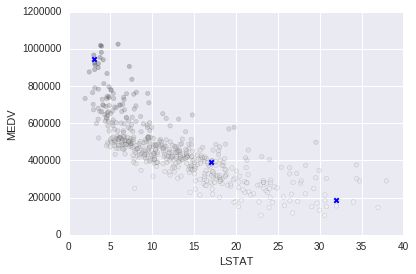

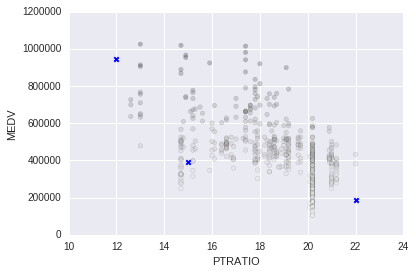

In [11]:
# Produce a matrix for client data
from matplotlib import pyplot as plt


client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

clients=np.transpose(client_data)
pred=reg.predict(client_data)
# Show predictions
for i, feat in enumerate(['RM','LSTAT','PTRATIO']):
    plt.scatter(features[feat],prices,alpha=0.25,c=prices)
    plt.scatter(clients[i],pred,marker='x',linewidth=2)
    plt.xlabel(feat)
    plt.ylabel('MEDV')
    plt.show()


Recommended selling price for Client 1's home: $426,300.00

Recommended selling price for Client 2's home: $277,200.00

Recommended selling price for Client 3's home: $789,600.00

We have seen in the above correlation heat map the number of rooms and percentage of less poverty level has high correlation with the house price which is getting reflected in the predicted price also. The mean price of the predicted values is 497,700 which is close to the mean value of the original data $454,342.94

From the above scatter plot also it can be infered that the house prices lies in the range of expected value with respect to the original data.

### Sensitivity
An optimal model is not necessarily a robust model. Sometimes, a model is either too complex or too simple to sufficiently generalize to new data. Sometimes, a model could use a learning algorithm that is not appropriate for the structure of the data given. Other times, the data itself could be too noisy or contain too few samples to allow a model to adequately capture the target variable — i.e., the model is underfitted. 

**Run the code cell below to run the `fit_model` function ten times with different training and testing sets to see how the prediction for a specific client changes with respect to the data it's trained on.**

In [12]:
import visuals as vs
print (client_data)
vs.PredictTrials(features, prices, fit_model, client_data)

[[5, 17, 15], [4, 32, 22], [8, 3, 12]]
391183.333333
Trial 1: $391,183.33
419700.0
Trial 2: $419,700.00
415800.0
Trial 3: $415,800.00
420622.222222
Trial 4: $420,622.22
418377.272727
Trial 5: $418,377.27
411931.578947
Trial 6: $411,931.58
399663.157895
Trial 7: $399,663.16
407232.0
Trial 8: $407,232.00
351577.61194
Trial 9: $351,577.61
413700.0
Trial 10: $413,700.00

Range in prices: $69,044.61


Finding the relationship between the house and the neighbourhood.

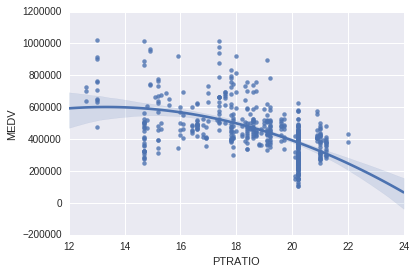

In [13]:
from matplotlib import pyplot
import seaborn as sns
sns.regplot(data.PTRATIO,data.MEDV,data=data,order=2)

**Answer: **
**->**There must be some varirance in prices because of inflation also which has not been taken into account. So today this trianed will not be that relevant.

**->**Features present are not sufficent as size, quality of appliances etc. was not used for training as these are also one of the critical factors which can decide the house prices.

**->**Looking at the above prediction trials model does not seems to be consistent enough.

**->**No data collected in urban city will definitely be not usefule in rural city.

**->** As can be seen in the graph above it is not really fair to judge the price of the house just based on neighbourhood.